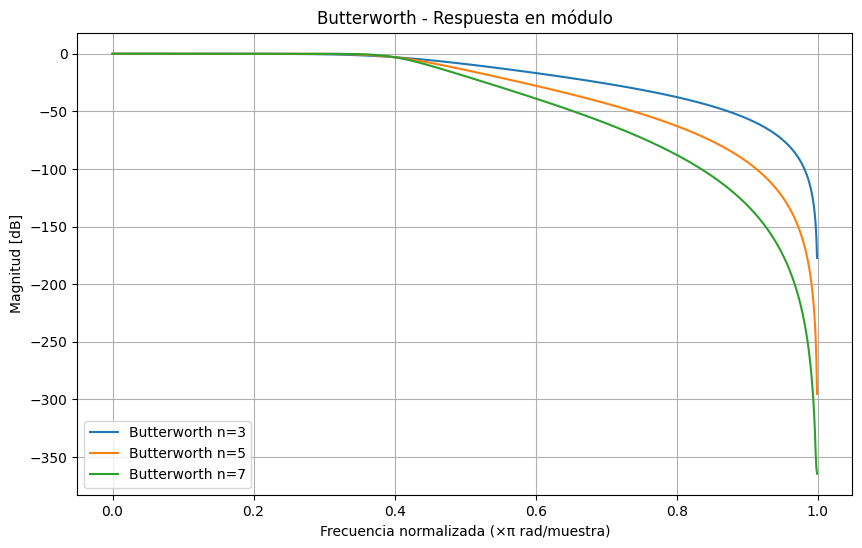

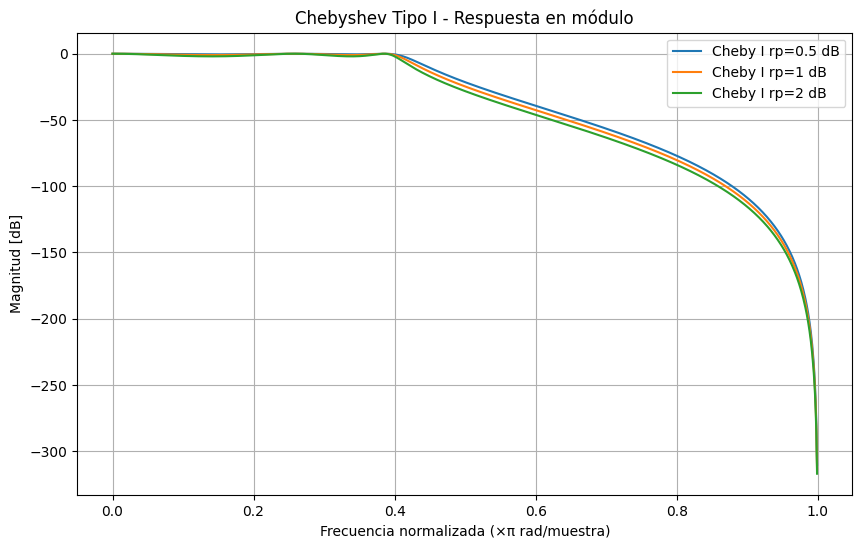

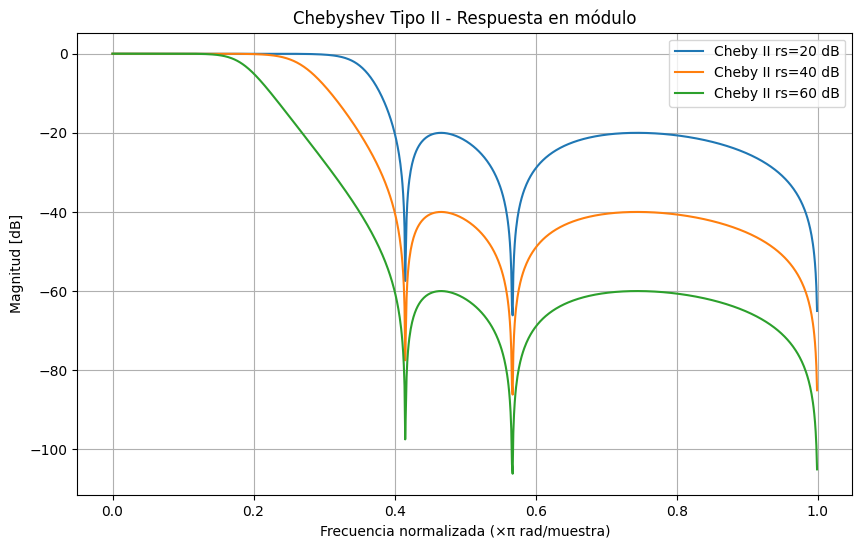

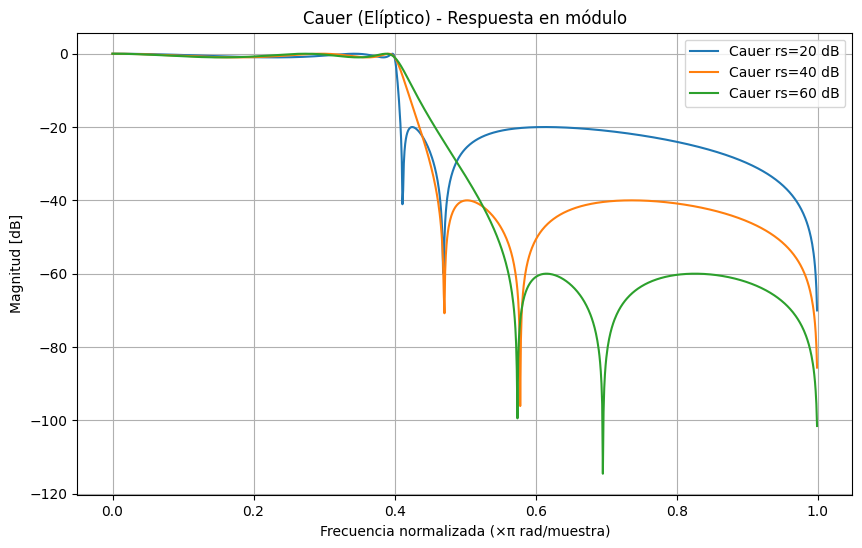

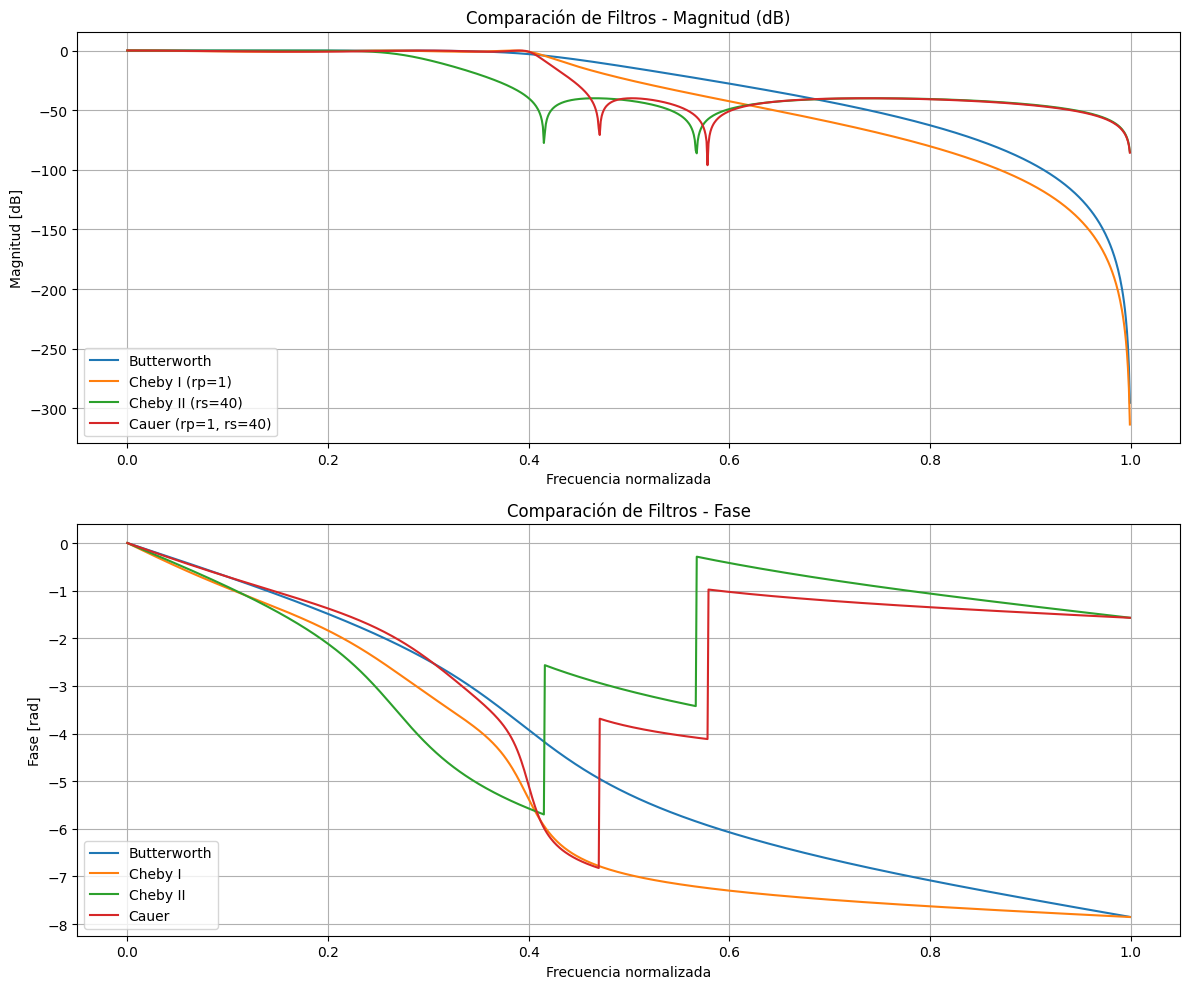

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# ============================================================
# Comparación didáctica de métodos de diseño de filtros IIR
# ============================================================
# Se estudian: Butterworth, Chebyshev I, Chebyshev II y Cauer (Elíptico)
# para un filtro pasabajo digital. Se analizan:
# - Respuesta en módulo (ganancia)
# - Respuesta en fase
# ============================================================

# Frecuencia de muestreo ficticia (normalizada, fs = 2 implica Nyquist = 1)
fs = 2

# Frecuencia de corte (normalizada de 0 a 1)
w_corte = 0.4  # Frecuencia en la que el filtro debe empezar a atenuar

# Frecuencia de análisis
w = np.linspace(0, np.pi, 1024)

# ---------------
# BUTTERWORTH
# ---------------
# Variables configurables:
# - Orden: determina cuán abrupta es la transición.
ordenes_butter = [3, 5, 7]

plt.figure(figsize=(10, 6))
for n in ordenes_butter:
    b, a = signal.iirfilter(N=n, Wn=w_corte, btype='low', ftype='butter', output='ba')
    w, h = signal.freqz(b, a, worN=1024)
    plt.plot(w/np.pi, 20 * np.log10(abs(h)), label=f'Butterworth n={n}')
plt.title('Butterworth - Respuesta en módulo')
plt.xlabel('Frecuencia normalizada (×π rad/muestra)')
plt.ylabel('Magnitud [dB]')
plt.grid(True)
plt.legend()
plt.show()

# ---------------
# CHEBYSHEV TIPO I
# ---------------
# Variables configurables:
# - Orden: pendiente de caída
# - rp: ripple en la banda de paso (dB)
ripples_cheby1 = [0.5, 1, 2]  # dB
orden_cheby1 = 5

plt.figure(figsize=(10, 6))
for rp in ripples_cheby1:
    b, a = signal.iirfilter(N=orden_cheby1, Wn=w_corte, rp=rp, btype='low', ftype='cheby1', output='ba')
    w, h = signal.freqz(b, a, worN=1024)
    plt.plot(w/np.pi, 20 * np.log10(abs(h)), label=f'Cheby I rp={rp} dB')
plt.title('Chebyshev Tipo I - Respuesta en módulo')
plt.xlabel('Frecuencia normalizada (×π rad/muestra)')
plt.ylabel('Magnitud [dB]')
plt.grid(True)
plt.legend()
plt.show()

# ---------------
# CHEBYSHEV TIPO II
# ---------------
# Variables configurables:
# - Orden: pendiente
# - rs: mínima atenuación en la banda eliminada (dB)
atenuaciones_cheby2 = [20, 40, 60]  # dB
orden_cheby2 = 5

plt.figure(figsize=(10, 6))
for rs in atenuaciones_cheby2:
    b, a = signal.iirfilter(N=orden_cheby2, Wn=w_corte, rs=rs, btype='low', ftype='cheby2', output='ba')
    w, h = signal.freqz(b, a, worN=1024)
    plt.plot(w/np.pi, 20 * np.log10(abs(h)), label=f'Cheby II rs={rs} dB')
plt.title('Chebyshev Tipo II - Respuesta en módulo')
plt.xlabel('Frecuencia normalizada (×π rad/muestra)')
plt.ylabel('Magnitud [dB]')
plt.grid(True)
plt.legend()
plt.show()

# ---------------
# CAUER (ELÍPTICO)
# ---------------
# Variables configurables:
# - Orden
# - rp: ripple en banda de paso (dB)
# - rs: atenuación mínima en banda de stop (dB)
rp_cauer = 1  # dB
rs_cauer_list = [20, 40, 60]  # dB
orden_cauer = 5

plt.figure(figsize=(10, 6))
for rs in rs_cauer_list:
    b, a = signal.iirfilter(N=orden_cauer, Wn=w_corte, rp=rp_cauer, rs=rs, btype='low', ftype='ellip', output='ba')
    w, h = signal.freqz(b, a, worN=1024)
    plt.plot(w/np.pi, 20 * np.log10(abs(h)), label=f'Cauer rs={rs} dB')
plt.title('Cauer (Elíptico) - Respuesta en módulo')
plt.xlabel('Frecuencia normalizada (×π rad/muestra)')
plt.ylabel('Magnitud [dB]')
plt.grid(True)
plt.legend()
plt.show()

# ---------------
# COMPARACIÓN FINAL
# ---------------
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Butterworth
b, a = signal.iirfilter(N=5, Wn=w_corte, btype='low', ftype='butter', output='ba')
w, h = signal.freqz(b, a, worN=1024)
axs[0].plot(w/np.pi, 20 * np.log10(abs(h)), label='Butterworth')
axs[1].plot(w/np.pi, np.unwrap(np.angle(h)), label='Butterworth')

# Chebyshev I
b, a = signal.iirfilter(N=5, Wn=w_corte, rp=1, btype='low', ftype='cheby1', output='ba')
w, h = signal.freqz(b, a, worN=1024)
axs[0].plot(w/np.pi, 20 * np.log10(abs(h)), label='Cheby I (rp=1)')
axs[1].plot(w/np.pi, np.unwrap(np.angle(h)), label='Cheby I')

# Chebyshev II
b, a = signal.iirfilter(N=5, Wn=w_corte, rs=40, btype='low', ftype='cheby2', output='ba')
w, h = signal.freqz(b, a, worN=1024)
axs[0].plot(w/np.pi, 20 * np.log10(abs(h)), label='Cheby II (rs=40)')
axs[1].plot(w/np.pi, np.unwrap(np.angle(h)), label='Cheby II')

# Cauer
b, a = signal.iirfilter(N=5, Wn=w_corte, rp=1, rs=40, btype='low', ftype='ellip', output='ba')
w, h = signal.freqz(b, a, worN=1024)
axs[0].plot(w/np.pi, 20 * np.log10(abs(h)), label='Cauer (rp=1, rs=40)')
axs[1].plot(w/np.pi, np.unwrap(np.angle(h)), label='Cauer')

# Personalización de los gráficos
axs[0].set_title('Comparación de Filtros - Magnitud (dB)')
axs[0].set_ylabel('Magnitud [dB]')
axs[0].set_xlabel('Frecuencia normalizada')
axs[0].grid(True)
axs[0].legend()

axs[1].set_title('Comparación de Filtros - Fase')
axs[1].set_ylabel('Fase [rad]')
axs[1].set_xlabel('Frecuencia normalizada')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()
